In [1]:
import pandas as pd
import numpy as np


# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
from lib import get_file_path
df = pd.read_csv(get_file_path('Google-Playstore.csv'))

In [8]:
# 데이터 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [26]:
# 데이터 값 실수. 소수점 두째자리까지 표시
pd.options.display.float_format = '{:.1f}'.format

# 통계값 확인
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.0,2290061.0,2312837.0,2312944.0,2312944.0
mean,2.2,2864.8,183445.2,320201.7,0.1
std,2.1,212162.6,15131439.1,23554954.9,2.6
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,50.0,84.0,0.0
50%,2.9,6.0,500.0,695.0,0.0
75%,4.3,42.0,5000.0,7354.0,0.0
max,5.0,138557570.0,10000000000.0,12057627016.0,400.0


In [10]:
# 결측치 탐색
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [18]:
# 상관관계 확인
df.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013038,0.011214,0.012615,-0.010756,-0.003674,0.160502,0.153820,0.019485
Rating Count,0.013038,1.000000,0.545281,0.547571,0.001410,-0.000411,0.005294,0.025737,0.137311
Minimum Installs,0.011214,0.545281,1.000000,0.954037,0.001623,-0.000461,0.002250,0.014179,0.059932
Maximum Installs,0.012615,0.547571,0.954037,1.000000,0.001815,-0.000515,0.002882,0.016101,0.064206
Free,-0.010756,0.001410,0.001623,0.001815,1.000000,-0.278831,0.123617,0.008669,-0.003157
Price,-0.003674,-0.000411,-0.000461,-0.000515,-0.278831,1.000000,-0.034276,-0.002634,0.000503
Ad Supported,0.160502,0.005294,0.002250,0.002882,0.123617,-0.034276,1.000000,0.138312,0.005702
In App Purchases,0.153820,0.025737,0.014179,0.016101,0.008669,-0.002634,0.138312,1.000000,0.046078
Editors Choice,0.019485,0.137311,0.059932,0.064206,-0.003157,0.000503,0.005702,0.046078,1.000000


<AxesSubplot:>

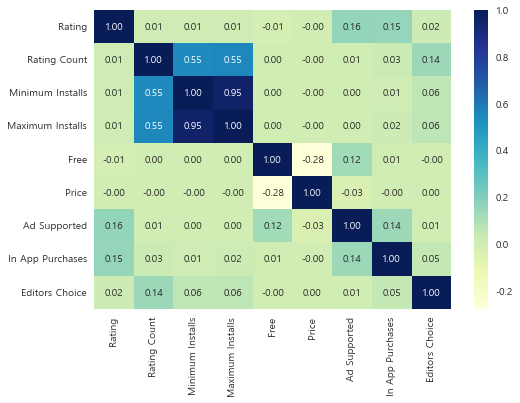

In [24]:
# 상관관계 히트맵 
sns.heatmap(df.corr(),  annot=True, fmt='.2f',  cmap='YlGnBu')

# 'Rating' 변수와 가장 상관이 높은 변수는 'Add supported', 'In App Purchases' 변수임

In [30]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

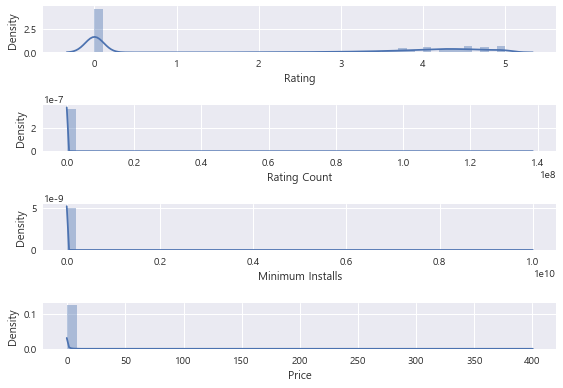

In [37]:
# 데이터의 분포
# bar
# 'Rating'
# 'Rating Count'
# 'Minimum Installs'
# 'Price'

# hist
# 'Category'
# 'Free'
# 'Ad Supported'
# 'In App Purchases'
# 'Editors Choice'

plt.subplot(4, 1, 1)     
sns.distplot(df['Rating'])

plt.subplot(4, 1, 2)     
sns.distplot(df['Rating Count'])

plt.subplot(4, 1, 3)     
sns.distplot(df['Minimum Installs'])

plt.subplot(4, 1, 4)     
sns.distplot(df['Price'])

plt.tight_layout()